In [4]:
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import os
from statistics import mode


In [12]:
meine_daten = pd.read_csv("annotated_data/cleaned_annotated_data_training.txt", names=["ID", "Date", "Time", "Comment Level", "Username", "Opinion", "Sentiment", "topic_comment", "Topic_article", "comment"], delimiter="\t")



In [24]:
pd.set_option('max_columns', None)
Nan = meine_daten[meine_daten["comment"].isnull()]
Nan.loc[:, "comment"] = Nan.loc[:, "Topic_article"]
Nan.loc[:, "Topic_article"] = "nan"
meine_daten_rest = meine_daten[len(Nan):]
full = pd.concat([Nan, meine_daten_rest])
full["Method"] = "manual"
pd.set_option('display.max_rows', 10)
full.to_csv("annotated_data/cleaned_annotated_data_training.csv", encoding="utf-8-sig", index=False, header=False)

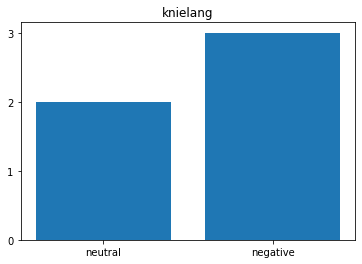

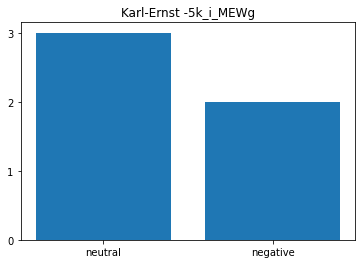

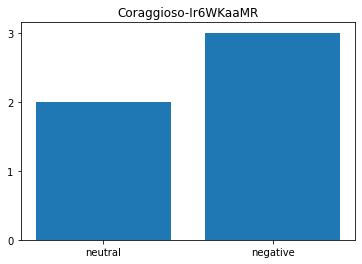

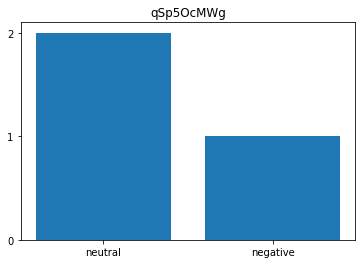

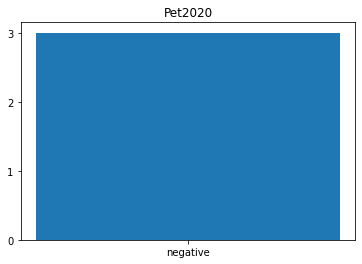

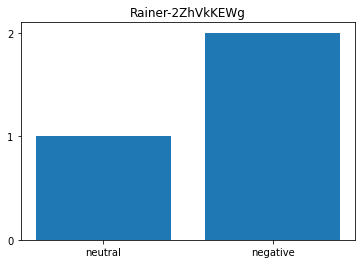

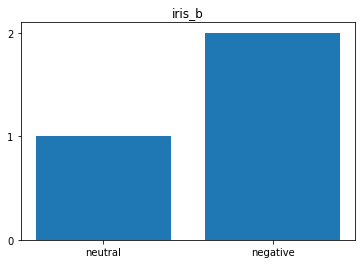

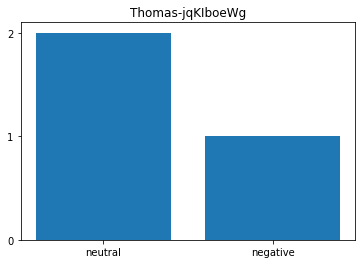

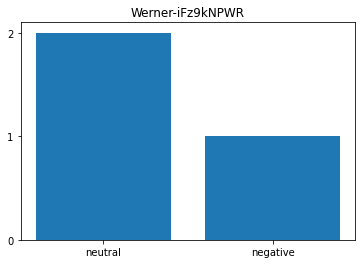

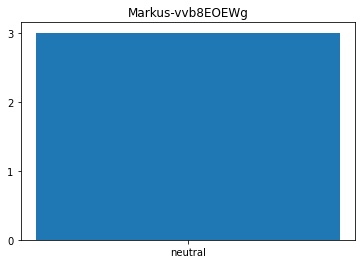

In [35]:
### Shows most active users in currently annotated 


# stores username and the corresponding sentiment
sentiment_person = defaultdict(list)


meine_daten.update(Nan)
pd.set_option("display.max_rows", None)
# print(meine_daten.Username.value_counts())

sentiment_verteilung = list(meine_daten.Sentiment.value_counts())
opinion_verteilung = list(meine_daten.Opinion.value_counts())

for username in meine_daten.Username.value_counts().index[:10]:
    liste = list(meine_daten.loc[meine_daten.Username == username]["Sentiment"])
    sentiment_person[username] = liste

for key, value in sentiment_person.items():
    sentiment_person[key] = dict((l, value.count(l)) for l in set(value))


for user in sentiment_person:
    ax = plt.figure().gca()
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    names = list(sentiment_person[user].keys()) 
    values = list(sentiment_person[user].values())
    plt.title(user)
    plt.bar(range(len(sentiment_person[user])), values, tick_label = names)
    plt.show()

In [31]:
print(*sentiment_person)

knielang Coraggioso-Ir6WKaaMR Pet2020 Dirk-H-xIsGPZR HansUlrich Markus-vvb8EOEWg GuckyCD Hans-hrmkpk6ZR Karl-Ernst -5k_i_MEWg Werner-iFz9kNPWR


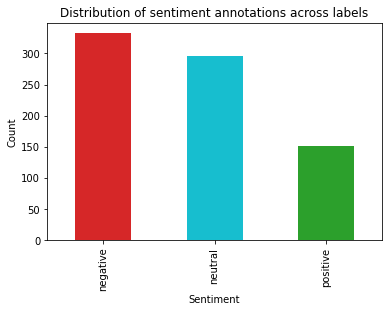

In [14]:
# Preliminary distributions
import matplotlib.pyplot as plt
sentiment = ["negative", "neutral", "positive"]


s = pd.Series(
    opinion_verteilung,
    index = sentiment
)


plt.title("Distribution of sentiment annotations across labels")
plt.ylabel('Count')
plt.xlabel('Sentiment')


ax = plt.gca()

my_colors = ["tab:red", "tab:cyan","tab:green"]

s.plot(kind="bar",
       color=my_colors)

plt.show()


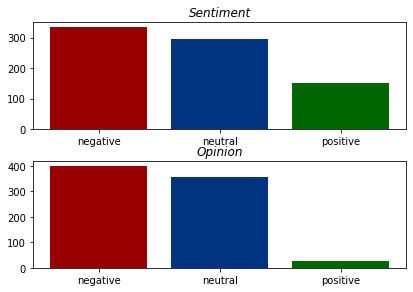

In [15]:
#Size 800 Dataset
fig, (ax1, ax2) = plt.subplots(2)

fig.tight_layout()

ax1.bar(sentiment, opinion_verteilung, color= ["#990000", "#003380","#006600"])

ax2.bar(sentiment, sentiment_verteilung, color= ["#990000", "#003380","#006600"])

ax1.set_title("Sentiment", fontstyle="italic")
ax2.set_title("Opinion", fontstyle="italic")

plt.savefig("Distribution_Sentiment_Opinion")

In [29]:
print(opinion_verteilung[0] / sum(opinion_verteilung))

print(opinion_verteilung[1] / sum(opinion_verteilung))

print(opinion_verteilung[2] / sum(opinion_verteilung))

print(opinion_verteilung[2])


0.4
0.396
0.204
102


### Distribution Full Data Set
This shows the Distribution of Sentiment and Opinion after Full annotation

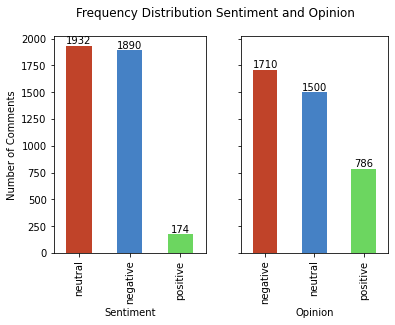

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
full_dataset = pd.read_csv("annotated_data/annotated_data_with_users_and_al_cleaned2check - Kopie - Kopie.csv", names=["ID", "Date", "Time", "Comment Level", "Username", "Opinion", "Sentiment", "topic_comment", "Topic_article", "comment", "Method"], encoding="ISO8859-1")

Opinion = full_dataset["Opinion"]
Sentiment = full_dataset["Sentiment"]

fig, axs = plt.subplots(1,2, sharey=True)

ax_sentiment = Sentiment.value_counts().plot(ax =axs[0], kind = "bar", color=["#4581C5","#C04329","#6CD660"])
ax_opinion = Opinion.value_counts().plot(ax=axs[1], kind = "bar", color=["#C04329","#4581C5","#6CD660"])

# ax_opinion.set_ylabel("Number of comments")
# ax_opinion.set_xlabel("Opinion")



axs.flat[1].set( xlabel = "Opinion")
axs.flat[0].set(ylabel="Number of Comments",xlabel = "Sentiment")

# for bar in ax_opinion.patches:
#     print(bar)
#     ax_opinion.annotate(
#         str(bar.get_height()), xy=(bar.get_x() + 0.1, bar.get_height() +20 ),
#         fontsize = 12
#     )
box = axs.flat[1].get_position()
box.x0 = box.x0 + 0.01
axs.flat[1].set_position(box)

for plotnumber in range(2):
    for p in axs.flat[plotnumber].containers:
        axs.flat[plotnumber].bar_label(p, fmt="%.0f")

# for bar in ax_sentiment.patches:
#     print(bar)
#     ax_sentiment.annotate(
#         str(bar.get_height()), xy=(bar.get_x() + 0.1, bar.get_height() +20 ),
#         fontsize = 12
#     )    

# ax_sentiment.set_ylabel("Number of comments")
# ax_sentiment.set_xlabel("Sentiment")
fig.suptitle("Frequency Distribution Sentiment and Opinion")
# plt.title("Sentiment Distribution")
plt.tight_layout
plt.show()

{'S_negativeO_negative': 1315, 'S_neutralO_neutral': 1120, 'S_neutralO_positive': 425, 'S_neutralO_negative': 387, 'S_negativeO_neutral': 359, 'S_negativeO_positive': 216, 'S_positiveO_positive': 145, 'S_positiveO_neutral': 21, 'S_positiveO_negative': 8}


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

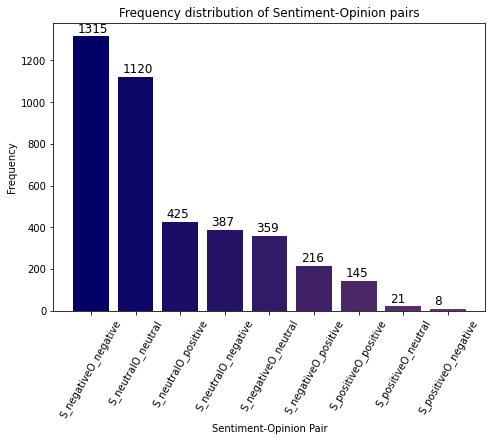

In [21]:
from collections import Counter
from turtle import color
cnt = Counter()
for pair in zip(Sentiment, Opinion):
    cnt["S_"+pair[0]+"O_"+pair[1]] += 1

cnt = {k:v for k,v in sorted(cnt.items(), key=lambda item: item[1], reverse=True)}
print(cnt)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])


my_colors = [(x/20, x/40, 0.4) for x in range(len(cnt.keys()))]
ax.bar(cnt.keys(), cnt.values(), color=my_colors)

for bar in ax.patches:
    ax.annotate(
        str(bar.get_height()), xy=(bar.get_x() + 0.1, bar.get_height() +20 ),
        fontsize = 12
    )
plt.xticks(rotation=60)
plt.ylabel("Frequency")
plt.xlabel("Sentiment-Opinion Pair")
plt.title("Frequency distribution of Sentiment-Opinion pairs")
plt.tight_layout

### Cohens Kappa

Formula as follows:

$z = \frac{p_o-p_e}{1-p_e}$

Cohen's kappa coefficient (κ) is a statistic that is used to measure inter-rater reliability (...)

https://en.wikipedia.org/wiki/Cohen%27s_kappa

In [ ]:
from sklearn import metrics

In [19]:
sven_opinion = []
vali_opinion = []

sven_sentiment = []
vali_sentiment = []

# Here we are reading in the data for cohens kappa
 
with open ("annotated_data/svens_agreement.txt") as sven:
    for line in sven:
        sven_opinion.append(line.split("\t")[5])
        sven_sentiment.append(line.split("\t")[6])
with open ("annotated_data/vali_agreement.txt") as vali:
    for line in vali:
        vali_opinion.append(line.split("\t")[5])
        vali_sentiment.append(line.split("\t")[6])

print(sven_sentiment)
print(vali_sentiment)

# We use sklearn method for this 

print(metrics.cohen_kappa_score(sven_opinion, vali_opinion))
print(len(vali_opinion))
for x in zip(sven_opinion, vali_opinion):
    print(x)
metrics.cohen_kappa_score(sven_sentiment, vali_sentiment)


['negative', 'neutral', 'neutral', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'neutral', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'neutral', 'neutral', 'neutral', 'neutral', 'negative', 'negative', 'negative', 'negative', 'neutral', 'negative', 'negative', 'neutral', 'negative', 'negative', 'neutral', 'negative', 'negative', 'negative', 'neutral', 'positive', 'negative', 'neutral', 'negative', 'neutral', 'negative', 'negative', 'neutral', 'negative', 'neutral', 'neutral', 'negative', 'negative', 'neutral', 'negative', 'negative', 'negative', 'neutral', 'neutral', 'negative', 'neutral', 'negative', 'neutral', 'negative', 'neutral']
['negative', 'neutral', 'neutral', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'neutral', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'neutral', 'negative', 'neutral', 'negative', 'negative', 'negative', 'negative', 'neutral', 'negat

0.6277145811789038

Reported values for Cohen's Kappa are **0.4782608695652174** and **0.6277145811789038** for Opinion and Sentiment Agreement Respectively.
<br>
<br>
These scores correspond to a specific Strength of Agreement

|Cohen's Kappa statistic   |Strength of Agreement
|---|---|
| 0.00  | Poor  |
|   0.00 - 0.20 | Slight  |
| 0.21 - 0.40  | Fair  |
| 0.41 - 0.60  | Moderate  |
| 0.61 - 0.80  | Substantial  |
| 0.81 - 1.00  | Almost Perfect  |

https://pubmed.ncbi.nlm.nih.gov/15883903/

The scores show **Moderate** and **Substantial** Agreement for Opinion and Sentiment respectivly. 
<br>
Even if these values show that the two annotators agreed in the majority of the cases, the task of annotating sentiment and opinion for a comment at hand was expected to be trivial, expecting higher values for kappa values in both cases.
<br>
By looking at the data, it is assumed that especially the neutral class was most diffcult to annotate and contributed the most to a decrease in score. This is why the following approach will count neutral classes from any annotator as agreeing labels in order to evaluate the difficulty of the neutral class

In [18]:
def kappa_o_neutral(agreements_1, agreements_2):
    """
    this function will return Cohen's Kappa without neutral classes
    :param agreements_1: list of strings
    :param agreements_2: list of strings
    :return: float
    """

    correct_correct = 0
    false_false = 0
    correct_false = 0
    false_correct = 0

    for idx, label in enumerate(agreements_1):

        # all cases where we have a "POS-POS-case"
        # Includes NEUTRAL NEUTRAL, POS POS, POS NEUTRAL, NEUTRAL POS
        if (label == agreements_2[idx] == "positive") or (label == agreements_2[idx] == "neutral") or ((label == "neutral") and (agreements_2[idx] == "positive")) or ((label == "positive") and (agreements_2[idx] == "neutral")):
            correct_correct += 1
        
        # all cases with "POS-NEG-case"
        elif ((label == "positive") and (agreements_2[idx] == "negative")):
            correct_false += 1

        # all cases with "NEG-POS-case"
        elif ((label == "negative") and (agreements_2[idx] == "positive")):
            false_correct += 1

        else:
            false_false += 1

    p_nought = (correct_correct + false_false) / (false_correct + correct_false + correct_correct + false_false)

    p_correct = (correct_correct + correct_false) / (correct_correct + correct_false + false_correct + false_false) * ((correct_correct + false_correct) / (correct_correct + correct_false + false_correct + false_false))

    p_incorrect = (false_correct + false_false) / (correct_correct + correct_false + false_correct + false_false) * ((correct_false + false_false) / (correct_correct + correct_false + false_correct + false_false))

    p_expected = p_correct + p_incorrect

    kappa = (p_nought - p_expected) / (1 - p_expected)

    print(p_nought, p_incorrect, p_correct)

    return kappa

kappa_o_neutral(vali_sentiment, sven_sentiment)

1.0 0.42250000000000004 0.12249999999999998


1.0

### Analysing specific users

We have seen that some users that have commented multiple times in the randomly sampled data show some consistency when it comes to the opinion and sentiment. The goal now is to annotate more comments from these users in order to get a broader overview and see if this consistency still holds true.



In [1]:
from bs4 import BeautifulSoup
from IPython.display import display
import requests
import os

In [33]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.collections import PolyCollection
import numpy as np
    

### Update: Full Data Set
This is added after the data set has been annotated fully. We can now see the distributions of users for the full dataset with

[(0.0, 0.0, 0.4), (0.05, 0.025, 0.4), (0.1, 0.05, 0.4), (0.15, 0.075, 0.4), (0.2, 0.1, 0.4), (0.25, 0.125, 0.4), (0.3, 0.15, 0.4), (0.35, 0.175, 0.4), (0.4, 0.2, 0.4), (0.45, 0.225, 0.4)]
[(0.0, 0.0, 0.4), (0.05, 0.025, 0.4), (0.1, 0.05, 0.4), (0.15, 0.075, 0.4), (0.2, 0.1, 0.4), (0.25, 0.125, 0.4), (0.3, 0.15, 0.4), (0.35, 0.175, 0.4), (0.4, 0.2, 0.4), (0.45, 0.225, 0.4)]


Text(0.5, 1.0, 'Top 10 User Frequency')

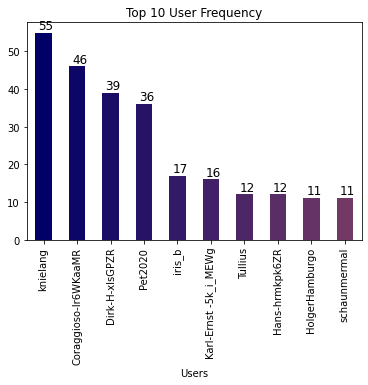

In [4]:
# Graph for User Frequency
from turtle import color
from unicodedata import name
import matplotlib.pyplot as plt
import pandas as pd
topic_dataset = pd.read_csv("annotated_data/annotated_data_with_users_and_al_cleaned2check - Kopie - Kopie.csv", names=["ID", "Date", "Time", "Comment Level", "Username", "Opinion", "Sentiment", "topic_comment", "Topic_article", "comment", "Method"], encoding="ISO8859-1")
my_colors = [(x/20, x/40, 0.4 ) for x in range(10)]
ax= topic_dataset["Username"].value_counts()[:10].plot(kind="bar", color=my_colors)


print(my_colors)



print(my_colors)
for bar in ax.patches:
    ax.annotate(
        str(bar.get_height()), xy=(bar.get_x() + 0.1, bar.get_height() +1 ),
        fontsize = 12
    )
plt.xlabel("Users")
plt.title("Top 10 User Frequency")

In [13]:
class UserCommentProfiling:
    """
    A class for profiling specific users 


    Attributes
    ----------

    user: str
        The username of the user to profile

    
    Methods
    ---------
    get_title_and_subtitle()
        returns the title and subtitle

    """
    def __init__(self, user):

        """
        Parameters
        ----------
        user : str
            The username of the user to profile
        """

        self.user = user
    

    def get_user(self):
        """
        this method will return the username

        Returns
        ----------
        string
            The username.
        """
        return self.user


    def get_user_data(self):
        """
        This method returns a pandas object
        with comments from the given user

        Returns
        ----------
        pandas object
            with comments from the given user
        """

        # The first 87 comments had been annotated without article topic, this is why the colums get shifted for the first few elements
        data = pd.read_csv("annotated_data/cleaned_annotated_data_training.txt",  names=["ID", "Date", "Time", "Comment Level", "Username", "Opinion", "Sentiment", "topic_comment", "Topic_article", "comment"], delimiter="\t")
        Nan = data[data["comment"].isnull()]
        Nan.loc[:, "comment"] = Nan.loc[:, "Topic_article"]
        Nan.loc[:, "Topic_article"] = "nan"

        data[:88] = Nan

        current_user_data = data.loc[data.Username == self.user]
        

        # check how far I have already annotated in order to not include comments twice
        with open ("annotated_data/annotated_data_training.txt", mode="r", encoding="utf-8") as f:
            lines = [line for line in f.readlines() if line != "\n"]
            done_line = len(lines)

        data_weiter = pd.read_csv("shuffled_corona_relevante_kommentare.txt", names=["ID", "Date", "Time", "Comment Level", "Username", "comment"], delimiter="\t")[done_line:]
        data_weiter = data_weiter.loc[data_weiter.Username == self.user]



        # Add missing columns to the dataframe (Here we are missing all labels in label_to_add)
        labels_to_add = ["Opinion", "Sentiment", "topic_comment", "Topic_article"]

        for i, label in enumerate(labels_to_add):
            data_weiter.insert(i+5, label, ["nan" for i in range(len(data_weiter))])

        # Concatenate both current progress of annotated comments of user and to be annoatated comments dataframes

        alle_user = pd.concat([current_user_data, data_weiter])
        display(alle_user)
        return alle_user
        
    def display_progress(self):
        """
        this method will display the annotation progress for the user given

        """

        mein_progress = pd.read_csv("annotated_data/users/" + self.user +"_dataframe.csv")


        for index, row in mein_progress.iterrows():
            if type(row["Opinion"]) != float:
                print(index)
            else:
                progress = index
                break
        display(mein_progress.iloc[:progress])


    def annotate(self, dataframe):
        """
        this method will return the will start annotation process for the user given

        """
        print(type((dataframe)))

        current_dir = os.getcwd()

        if not isinstance(dataframe, pd.DataFrame):
            print("reading csv")
            dataframe = pd.read_csv("annotated_data/users/" + dataframe)
            display(dataframe)
            as_csv = True
        else:
            as_csv = False
    
        labels = ["positive", "negative", "neutral", "exit"]


        for index, row in dataframe.iterrows():
            print(row["Opinion"], type(row["Opinion"]))
            if (as_csv and type(row["Opinion"]) != float):
                continue
            elif (not row["Opinion"] == "nan" and not as_csv):
                continue
                
            request = requests.get("https://www.spiegel.de/wissenschaft/medizin/corona-news-am-samstag-die-wichtigsten-entwicklungen-zu-sars-cov-2-und-covid-19-a-" + row["ID"])

            soup = BeautifulSoup(request.content, "html.parser")

            title = soup.find("title").text

            subtitle = soup.find("meta", property="og:description")["content"]

            Opinion_kommentar = input("Opinion ------" +row["comment"])

            while Opinion_kommentar not in labels:
                Opinion_kommentar = input("Opinion ------" +row["comment"])
            
            if Opinion_kommentar == "exit":
                dataframe.to_csv("annotated_data/users/" + self.user + "_dataframe.csv", encoding="utf-8-sig", index=False) 
                return

            Sentiment_kommentar = input("Sentiment ------" +row["comment"])

            while Sentiment_kommentar not in labels:
                Sentiment_kommentar  = input("Sentiment ------" +row["comment"])

            topic_comment = input("Topic Comment ------" +row["comment"])

            topic_article = input("Topic Article ------" +title + "\n" + subtitle)
            
            print(row)
            dataframe.loc[dataframe.ID == row["ID"], :] = [row["ID"], row["Date"] , row["Time"],row["Comment Level"], row["Username"],Opinion_kommentar, Sentiment_kommentar, topic_comment, topic_article, row["comment"]]
            # except ValueError:
            #     print([x for x in dataframe.loc[dataframe.ID == row["ID"]]], "XXXXXXXXXX", [row["ID"], row["Date"] , row["Time"],row["Comment Level"], row["Username"],Opinion_kommentar, Sentiment_kommentar, topic_comment, topic_article, row["comment"]])
            
            

            print(Opinion_kommentar, Sentiment_kommentar, topic_article, topic_comment)

            dataframe.to_csv("annotated_data/users/" + self.user + "_dataframe.csv", encoding="utf-8-sig", index=False)

# meine_daten = pd.read_csv("shuffled_corona_relevante_kommentare.txt", names=["ID", "Date", "Time", "Comment Level", "Username","comment"], delimiter="\t")

# frequent_users = ['knielang', 'Coraggioso-Ir6WKaaMR', 'Pet2020', 'Dirk-H-xIsGPZR', 'HansUlrich', 'Markus-vvb8EOEWg', 'GuckyCD', 'Hans-hrmkpk6ZR', 'Karl-Ernst -5k_i_MEWg', 'Werner-iFz9kNPWR']

# meine_daten = meine_daten[done_line:]

# meine_daten.loc[meine_daten.Username == "Pet2020"]

In [ ]:
# Pet2020', 'Dirk-H-xIsGPZR', 'HansUlrich', 'Markus-vvb8EOEWg', 'GuckyCD', 'Hans-hrmkpk6ZR', 'Karl-Ernst -5k_i_MEWg', 'Werner-iFz9kNPWR'

In [ ]:
### First we create an object for the user
### The get user method creates a dataframe that can be used to annotate.
### After this annotation, opinion can be annotated with "exit" in order to save the progress
### The following annotations are done using the .csv name of the file

meinUser = UserCommentProfiling('Dirk-H-xIsGPZR')
meinUser.display_progress()
# meinUser.get_title_and_subtitle("529f745f-c1a5-47ad-8be5-7121e770bf66")


# meinUser.annotate(meinUser.get_user_data())
# meinUser.annotate("Dirk-H-xIsGPZR_dataframe.csv")

### Addition after full annotation
After fully annotating, we can simply extract the users via their username and then pick the first n samples accorind to our needs. Looking at our annotated data, the four most common comment writers are still knielang, coragiosso, dirk and pet.

In [21]:
import pandas as pd

full_data = pd.read_csv("annotated_data/annotated_data_with_users_and_al_cleaned2check_final_topics.csv", names=["ID", "Date", "Time", "Comment Level", "Username", "Opinion", "Sentiment", "topic_comment", "Topic_article", "comment", "Method"],  encoding="ISO8859-1")
full_data["Date"] = pd.to_datetime(full_data["Date"])
full_data.sort_values(by="Date", inplace=True)
user_sorted_time = full_data.loc[full_data["Username"].isin(['knielang', 'Coraggioso-Ir6WKaaMR', 'Pet2020', 'Dirk-H-xIsGPZR'])]

for user in ['knielang', 'Coraggioso-Ir6WKaaMR', 'Pet2020', 'Dirk-H-xIsGPZR']:

    user_data = user_sorted_time.loc[user_sorted_time["Username"] == user][:30]
    user_data.to_csv("annotated_data/user_develop/" + user + "develop.csv", index = False, encoding="ISO8859-1", header=None)


### Plotting the Data

We have annotated the data for 4 user (30 comments each). In the following step, we will plot the sentiment and opinion development of each user and also show on which topics the user commented the most.

In [34]:
import matplotlib.pyplot as plt
def plot_dev(user, rows, type):

    """
        Parameters
        ----------
        user : str
            The username of the user to be plotted

        rows: int
            Number of comments to plot


        type: str ("opinion" | "sentiment")
            If the samples to be plotted are opinion or sentiment
    """

    dataframe = pd.read_csv("annotated_data/user_develop/" + user + "develop.csv", names=["ID", "Date", "Time", "Comment Level", "Username", "Opinion", "Sentiment", "topic_comment", "Topic_article", "comment", "Method"], nrows=rows, encoding="ISO8859-1")

    print(dataframe.dtypes)
    user = user
    dataframe["Date"] = pd.to_datetime(dataframe["Date"])
    

    # nan = dataframe["Opinion"].notnull()

    # dataframe = dataframe.loc[nan]

    dataframe.sort_values(by="Date", inplace=True)

    first_date = dataframe["Date"][rows-1]
    last_date = dataframe["Date"][0]
    

    # display(dataframe)
    colorsmap = {"negative": "orangered", "positive": "mediumseagreen", "neutral": "steelblue"}

    verts = {"positive" : [], "negative" : [], "neutral" : []}
    colors = {"positive" : [], "negative" : [], "neutral" : []}
    for i in range(len(dataframe)):
        verts[dataframe.iloc[i][type.capitalize()]].append([(i/10, 0.1),(i/10, 0.2),((i+1)/10, 0.2),((i+1)/10, 0.1)])
        colors[dataframe.iloc[i][type.capitalize()]].append(colorsmap[dataframe.iloc[i][type.capitalize()]])



    
    # for x in meine_kategorie:
    #     colors.append(colorsmap[x])

    print(verts.items())

    
    # bars = PolyCollection(verts, facecolors=colors)
    fig, ax = plt.subplots()


    # Needed in order to be able to lable all categories with legend
    for comment in verts.keys():
        if verts[comment]:
            bars = PolyCollection(verts[comment], facecolors = colors[comment], label = comment)
            ax.add_collection(bars)

   
    ax.set_ylim([0.05, 0.25])
    ax.set_xlim(0, len(dataframe)*0.1)


    ticks = ax.get_xticklabels()
    ticks[0] = first_date
    ticks[-1] = last_date
    ax.set_xticklabels(ticks)

    ax.set_yticklabels([])
    ax.set_ylabel(type)
    plt.legend(loc='upper left')
    plt.title(type + " development for user " + user)

In [27]:
frame = pd.read_csv("annotated_data/users/knielang_dataframe.csv", nrows=30)

frame.iloc[0]["Sentiment"]


'neutral'

ID               object
Date             object
Time             object
Comment Level     int64
Username         object
Opinion          object
Sentiment        object
topic_comment    object
Topic_article    object
comment          object
Method           object
dtype: object
dict_items([('positive', []), ('negative', [[(0.0, 0.1), (0.0, 0.2), (0.1, 0.2), (0.1, 0.1)], [(0.6, 0.1), (0.6, 0.2), (0.7, 0.2), (0.7, 0.1)], [(0.8, 0.1), (0.8, 0.2), (0.9, 0.2), (0.9, 0.1)], [(0.9, 0.1), (0.9, 0.2), (1.0, 0.2), (1.0, 0.1)], [(1.3, 0.1), (1.3, 0.2), (1.4, 0.2), (1.4, 0.1)], [(1.5, 0.1), (1.5, 0.2), (1.6, 0.2), (1.6, 0.1)], [(2.6, 0.1), (2.6, 0.2), (2.7, 0.2), (2.7, 0.1)], [(2.7, 0.1), (2.7, 0.2), (2.8, 0.2), (2.8, 0.1)], [(2.8, 0.1), (2.8, 0.2), (2.9, 0.2), (2.9, 0.1)], [(2.9, 0.1), (2.9, 0.2), (3.0, 0.2), (3.0, 0.1)]]), ('neutral', [[(0.1, 0.1), (0.1, 0.2), (0.2, 0.2), (0.2, 0.1)], [(0.2, 0.1), (0.2, 0.2), (0.3, 0.2), (0.3, 0.1)], [(0.3, 0.1), (0.3, 0.2), (0.4, 0.2), (0.4, 0.1)], [(0.4, 0.1), 

C:\Users\Kirchner\AppData\Local\Temp/ipykernel_20232/888883205.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticks)


ID               object
Date             object
Time             object
Comment Level     int64
Username         object
Opinion          object
Sentiment        object
topic_comment    object
Topic_article    object
comment          object
Method           object
dtype: object
dict_items([('positive', [[(0.2, 0.1), (0.2, 0.2), (0.3, 0.2), (0.3, 0.1)], [(0.3, 0.1), (0.3, 0.2), (0.4, 0.2), (0.4, 0.1)], [(0.9, 0.1), (0.9, 0.2), (1.0, 0.2), (1.0, 0.1)], [(1.3, 0.1), (1.3, 0.2), (1.4, 0.2), (1.4, 0.1)], [(1.5, 0.1), (1.5, 0.2), (1.6, 0.2), (1.6, 0.1)], [(1.9, 0.1), (1.9, 0.2), (2.0, 0.2), (2.0, 0.1)], [(2.0, 0.1), (2.0, 0.2), (2.1, 0.2), (2.1, 0.1)], [(2.1, 0.1), (2.1, 0.2), (2.2, 0.2), (2.2, 0.1)], [(2.2, 0.1), (2.2, 0.2), (2.3, 0.2), (2.3, 0.1)], [(2.4, 0.1), (2.4, 0.2), (2.5, 0.2), (2.5, 0.1)], [(2.9, 0.1), (2.9, 0.2), (3.0, 0.2), (3.0, 0.1)]]), ('negative', [[(0.1, 0.1), (0.1, 0.2), (0.2, 0.2), (0.2, 0.1)], [(0.5, 0.1), (0.5, 0.2), (0.6, 0.2), (0.6, 0.1)], [(0.6, 0.1), (0.6, 0.2), (0.7,

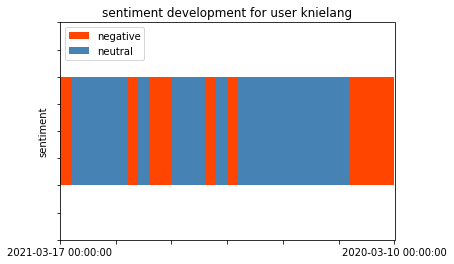

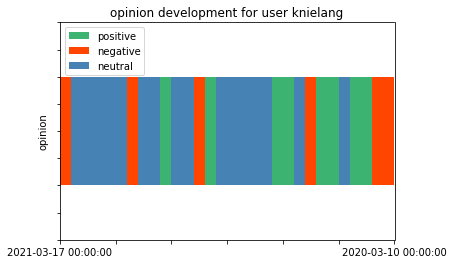

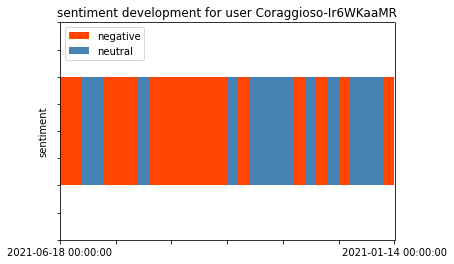

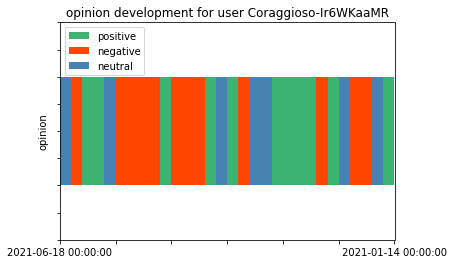

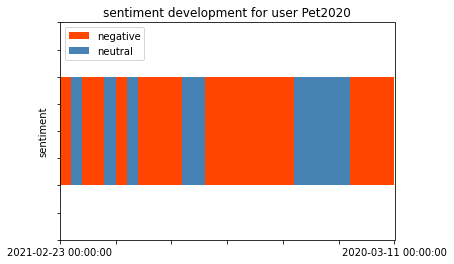

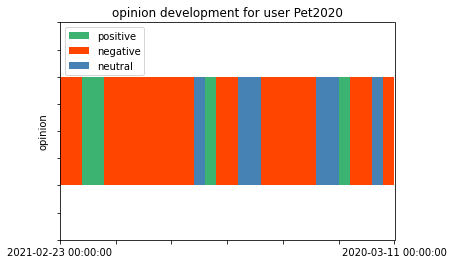

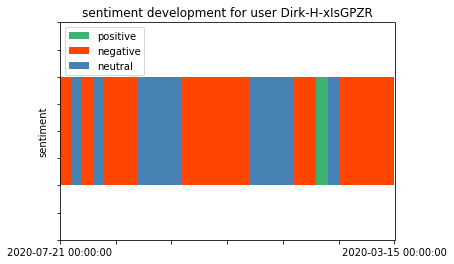

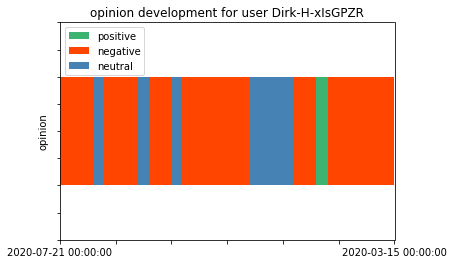

In [35]:
user = ['knielang', 'Coraggioso-Ir6WKaaMR', 'Pet2020', 'Dirk-H-xIsGPZR']

for x in user:
    for y in ["sentiment", "opinion"]:
        plot_dev(x, 30 , y)

### Results
This graph shows the development in sentiment and opinion from left to right.
Here we can see that users have longer periods where they keep a constant sentiment. This can be seen in longer "blocks" of one color. The majority of user "knielang"'s comments seem to contain a neutral sentiment wheras for other users, the sentiment seems to be negative in the majority of the cases. Opinion wise, the distribution for these analysed users seems to be more uneven, but users like "Dirk" and "Pet2020" still seem to utter a negative opinion in most of the cases. This is due to the fact that different topics are discussed in these comments, leading to differnet opinions for different topic. As a result, the graphic shown does not necesserily imply that opinion changes frequently for users like "Coraggioso" as they have to be put in relation with the topics of the comment.

### Adding automatically annotated data
We saw that there is a consistency when it comes to the sentiment and opinion of users across a specific timespan. The following method will approximate this finding and annotate comments with the corresponding label that has been uttered in the majority of the cases for these users.

In [5]:
### Load in the data, replace topic article for firs 88 by nan and add column for differentiating 
data_annotated = pd.read_csv("annotated_data/cleaned_annotated_data_training.txt", names=["ID", "Date", "Time", "Comment Level", "Username", "Opinion", "Sentiment", "topic_comment", "Topic_article", "comment"], delimiter="\t")
Nan = data_annotated[data_annotated["comment"].isnull()]
Nan.loc[:, "comment"] = Nan.loc[:, "Topic_article"]
Nan.loc[:, "Topic_article"] = "nan"
data_annotated = pd.concat([Nan, data_annotated[88:]])
data_annotated["Annotation_Method"] = "manual"
data_annotated



### Load user csvs

my_users_dataframe = pd.DataFrame(columns=["ID", "Date", "Time", "Comment Level", "Username", "Opinion", "Sentiment", "topic_comment", "Topic_article", "comment"])
user_list = os.listdir("annotated_data/users")

for user in user_list:
    current_user = pd.read_csv("annotated_data/users/" + user, nrows=30)
    print(user, mode(current_user["Sentiment"]))
    print(user, mode(current_user["Opinion"]))
    my_users_dataframe = pd.concat([my_users_dataframe, current_user]) 

my_users_dataframe["Annotation_Method"] = "manual"

### We put the annotated users and the already annotated data together into one dataframe

data_annotated = pd.concat([data_annotated, my_users_dataframe])
data_annotated.index = [i for i in range(len(data_annotated))]
display(data_annotated)

### Shuffle the data and export
data_annotated  = data_annotated.sample(frac=1).reset_index(drop=True)
data_annotated.to_csv("annotated_data/annotated_data_with_users.csv", encoding="utf-8-sig", index=False, header=False)
data_annotated

Coraggioso-Ir6WKaaMR_dataframe.csv negative
Coraggioso-Ir6WKaaMR_dataframe.csv positive
Dirk-H-xIsGPZR_dataframe.csv negative
Dirk-H-xIsGPZR_dataframe.csv negative
knielang_dataframe.csv neutral
knielang_dataframe.csv neutral
Pet2020_dataframe.csv negative
Pet2020_dataframe.csv negative


d:\Program Files (x86)\Miniconda3\envs\Masterarbeit\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
d:\Program Files (x86)\Miniconda3\envs\Masterarbeit\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,ID,Date,Time,Comment Level,Username,Opinion,Sentiment,topic_comment,Topic_article,comment,Annotation_Method
0,68232648-390f-479d-b6b6-8887f5e5a926,2020-06-03,12:44,0,Christian-BH-8zc9Wg,negative,negative,virus,nan,Nachtrag: Dieser Artikel ist wirklich enttäusc...,manual
1,8571cce4-d4d3-4278-b632-50272a6d28a9,2020-03-17,20:25,0,Rainer-Q04T_RlWg,neutral,negative,krise,nan,Ein Flugzeug aus China macht noch keinen Frühl...,manual
2,5c310588-07cb-44a8-9d05-944c9e4176f7,2020-11-27,07:07,0,Alexander-rN6RVnEZg,neutral,neutral,virus,nan,Ganz Belgien hatte einen Wert von 1750 über 14...,manual
3,36089acc-5eec-4ea9-bc68-1399b6b8bf17,2021-01-02,18:00,0,HerrmannSchmidt,neutral,negative,reise,nan,"Ganz ehrlich als ich da war gestern, war nur e...",manual
4,50b7c60c-57b9-45b3-8593-8d42ec0eb99f,2021-01-15,12:13,0,MartinHa,neutral,neutral,impfung,nan,Der Anstieg der Sterblichkeit könnte mit der s...,manual
...,...,...,...,...,...,...,...,...,...,...,...
1315,e489b0a7-e4e8-48f0-889c-5b705b71097e,2020-11-29,12:02,0,Pet2020,neutral,neutral,warnapp,überblick,Weils so schön ist sollte man noch einmal die ...,manual
1316,c464efa7-1017-40b0-90aa-00d725786acf,2020-10-08,09:12,0,Pet2020,negative,negative,politik,infektion,"Oder die Tatsache, dass 16 Kultusministerien ...",manual
1317,98a47d56-83d4-4733-a410-f8c69ed02689,2020-04-08,12:37,0,Pet2020,negative,neutral,who,who,Timeline: 9.1 WHO: China hat alles im Griff h...,manual
1318,0bc31b33-967f-4ebf-adee-fb34013ea8e6,2021-04-07,06:59,0,Pet2020,negative,negative,rki,überblick,"Für all diejenigen die meinen, dass die Zahlen...",manual


,ID,Date,Time,Comment Level,Username,Opinion,Sentiment,topic_comment,Topic_article,comment,Annotation_Method
0,1a24c2e2-58a9-4e6c-b9bd-64f73537a38b,2020-04-11,05:34,0,Manfred-C4FP3NGZg,negative,negative,lockdown,lockdown,Wenn die „Kur“ (Shutdown) für einen „Patienten...,manual
1,82bf1e89-6510-4339-947c-97b47e12bd92,2021-01-18,06:53,0,HiThere,negative,neutral,lockdown,lockdown,die Leute mit ihren mega super drakonischen lo...,manual
2,0406673b-227c-44d3-a1a7-9b1b8d4c1632,2020-12-30,12:44,0,Muschinki-clMz73NGg,negative,negative,politik,impfung,"Wie kommt es eigentlich, dass alle Länder an d...",manual
3,b68811ca-8081-45a7-b6e2-9d1b006c5be0,2021-02-15,18:23,0,Franz-Josef-MSZopl0Gg,negative,negative,lockdown,fußball,"Bin wahrlich kein Bayernfan, geht ja gar nicht...",manual
4,468bba39-60b6-4790-b268-38ea4a381718,2021-02-18,09:49,0,Johannes-MipC-__WR,neutral,neutral,virus,überblick,"Naja, da die englische Variante mitlerweile me...",manual
...,...,...,...,...,...,...,...,...,...,...,...
1315,3763f118-b5c2-401c-8ee2-ead18c5e1fe0,2020-08-07,12:12,0,Ernst-DJPCDS_Wg,neutral,neutral,impfung,virus,Natürlich wird es wieder normal werden nur wir...,manual
1316,8ef3cae3-5336-42d4-8f6e-3278476a2077,2021-02-18,11:45,0,Timo-74adOzzGg,negative,negative,reise,demos,"Asozial ist ja wohl jemand, der zwischen Wien ...",manual
1317,7dc98145-5c9a-439b-aa27-252138f633d0,2021-01-28,15:50,0,Christopher-8EfdHDMZR,negative,negative,politik,politik,"Der Sommer wurde nicht genutzt, aber das ist d...",manual
1318,9328fa2a-245d-44ad-8732-fb0175877fca,2021-05-05,14:07,0,AnnaO,positive,neutral,impfung,überblick,Am sinnvollsten wäre es für solche Brennpunkti...,manual


In [3]:
### Most common sentiment to user dict

common_sentiment = {user:"" for user in os.listdir("annotated_data/users")}

for user in common_sentiment.keys():
    df = pd.read_csv("annotated_data/users/" + user, header=0, nrows=30)
    common_sentiment[user] = mode(df["Sentiment"])




Four active users have been profiled in regards to their overall sentiment. Now, the size of the manually annotated data will be increased by adding automatically annotated data. These samples will be automatically annotated by searching through all covid related comments by the profiled users.




In [108]:

alle_kommentare = pd.read_csv("shuffled_corona_relevante_kommentare.txt", names=["ID", "Date", "Time", "Comment Level", "Username", "Opinion", "Sentiment", "topic_comment", "Topic_article", "comment"], delimiter="\t", index_col=False)
annotierte_kommentare = pd.read_csv("annotated_data/annotated_data_with_users.csv", names = ["ID", "Date", "Time", "Comment Level", "Username", "Opinion", "Sentiment", "topic_comment", "Topic_article", "comment", "Annotation_Method"], index_col=False)
username = [user.split("_")[0] for user in common_sentiment.keys()]
print(username)
display(annotierte_kommentare)

counts = {user:0 for user in username}
for index, row in alle_kommentare.iterrows():
    if row["Username"] in username and counts[row["Username"]] < 100:
        annotierte_kommentare = annotierte_kommentare.append(row)
        counts[row["Username"]] += 1
        if list(counts.values()) == [100 for i in counts.values()]:
            break
        
annotierte_kommentare.reset_index(inplace=True, drop=True)  
display(annotierte_kommentare)

['Coraggioso-Ir6WKaaMR', 'Dirk-H-xIsGPZR', 'knielang', 'Pet2020']


,ID,Date,Time,Comment Level,Username,Opinion,Sentiment,topic_comment,Topic_article,comment,Annotation_Method
0,350d36f2-f19f-4f7e-b629-2555e5f2c4e7,2021-02-12,10:11,0,Dapper-1DEIcvhGR,negative,neutral,grenzschließung,überblick,Neben der englischen und der südafrikanischen ...,manual
1,2b929680-3329-419b-8391-684fae4fdef4,2020-05-21,19:14,0,W.-Zt-aesUWR,neutral,negative,wirtschaft,überblick,"Sieht ja so aus, als ob das „High-Tech“ Land U...",manual
2,51db8bf3-1660-4689-a132-10b9004362ad,2021-03-24,09:33,0,Heinz-3uXV1BwMR,negative,negative,lockdown,NaN,Man könnte fast vermuten dass die ganze Verans...,manual
3,c8648c67-4e4f-4e60-9384-4ec99b9cf6f5,2021-04-12,09:22,0,Christian-4gGcBvaMR,negative,negative,tests,überblick,Eins doch klar: Unternehmen gehen immer den We...,manual
4,8715a6c6-839c-46e9-982a-458eda17e408,2021-01-05,06:38,0,Ulrich-KhIth7GWg,positive,neutral,grenzschliessung,tests,Warum macht msn nicht einfach die Grenzen dich...,manual
...,...,...,...,...,...,...,...,...,...,...,...
1118,03a82d6e-12cd-4ca8-9c93-2004520ff9b8,2020-04-08,10:37,0,MarkusW77,negative,neutral,wirtschaft,wirtschaft,"Das Geld ist doch für groß Konzerne, Banken un...",manual
1119,8dc50c9f-0033-4992-922a-d60accf92fae,2021-07-13,18:33,0,Werner-iFz9kNPWR,neutral,neutral,virus,überblick,"Ah, jetzt ist Delta nicht mehr ansteckender?",manual
1120,1becd6c6-d8d2-4d50-ba4c-240e38ca802c,2020-03-28,17:21,0,RROCK,positive,neutral,warnapp,warnapp,ist doch ganz einfach. Wer negativ getestet is...,manual
1121,9f037c70-6732-4b0f-b06c-3142985018db,2021-05-08,11:21,0,BerndPaysan,neutral,neutral,china,impfung,China steht nach offiziellen Angaben ganz kurz...,manual


,ID,Date,Time,Comment Level,Username,Opinion,Sentiment,topic_comment,Topic_article,comment,Annotation_Method
0,350d36f2-f19f-4f7e-b629-2555e5f2c4e7,2021-02-12,10:11,0,Dapper-1DEIcvhGR,negative,neutral,grenzschließung,überblick,Neben der englischen und der südafrikanischen ...,manual
1,2b929680-3329-419b-8391-684fae4fdef4,2020-05-21,19:14,0,W.-Zt-aesUWR,neutral,negative,wirtschaft,überblick,"Sieht ja so aus, als ob das „High-Tech“ Land U...",manual
2,51db8bf3-1660-4689-a132-10b9004362ad,2021-03-24,09:33,0,Heinz-3uXV1BwMR,negative,negative,lockdown,NaN,Man könnte fast vermuten dass die ganze Verans...,manual
3,c8648c67-4e4f-4e60-9384-4ec99b9cf6f5,2021-04-12,09:22,0,Christian-4gGcBvaMR,negative,negative,tests,überblick,Eins doch klar: Unternehmen gehen immer den We...,manual
4,8715a6c6-839c-46e9-982a-458eda17e408,2021-01-05,06:38,0,Ulrich-KhIth7GWg,positive,neutral,grenzschliessung,tests,Warum macht msn nicht einfach die Grenzen dich...,manual
...,...,...,...,...,...,...,...,...,...,...,...
1518,0d23ae8f-843f-4390-bc1e-17d96798a15b,2020-04-16,12:23,0,Dirk-H-xIsGPZR,Wir sollten ruhig noch ein wenig unsere Hyster...,NaN,NaN,NaN,NaN,NaN
1519,51b688e3-0778-431d-bf27-b00193257872,2020-04-23,16:43,0,Dirk-H-xIsGPZR,"Merkel irrt in der Annahme, dass die Bevölkeru...",NaN,NaN,NaN,NaN,NaN
1520,756c63ac-6145-4612-9226-08277254ae4f,2020-09-09,15:11,0,Dirk-H-xIsGPZR,So wird das nichts Nicht über jeden möglichen ...,NaN,NaN,NaN,NaN,NaN
1521,a445e031-7c82-4495-bf16-58266ce5c81e,2020-04-23,05:44,0,Dirk-H-xIsGPZR,Wer kassiert denn jetzt bei AKK und Walter-Bor...,NaN,NaN,NaN,NaN,NaN


In [109]:
#### Replace Sentiment for user with most common sentiment of that user
for idx, row in annotierte_kommentare[~annotierte_kommentare["Sentiment"].isin(["negative", "neutral", "positive"])].iterrows():
    if row["Username"] in username:
        annotierte_kommentare.loc[idx, "Sentiment"] = common_sentiment[row["Username"]+"_dataframe.csv"]
        annotierte_kommentare.loc[idx, "comment"] = annotierte_kommentare.loc[idx, "Opinion"]
        annotierte_kommentare.loc[idx, "Opinion"] = "NaN"
        annotierte_kommentare.loc[idx, "Annotation_Method"] = "automatic"
display(annotierte_kommentare)


annotierte_kommentare  = annotierte_kommentare.sample(frac=1).reset_index(drop=True)
annotierte_kommentare

annotierte_kommentare.to_csv("annotated_data/annotated_data_with_users_automatic.csv", encoding="utf-8-sig", index=False, header=False)

,ID,Date,Time,Comment Level,Username,Opinion,Sentiment,topic_comment,Topic_article,comment,Annotation_Method
0,350d36f2-f19f-4f7e-b629-2555e5f2c4e7,2021-02-12,10:11,0,Dapper-1DEIcvhGR,negative,neutral,grenzschließung,überblick,Neben der englischen und der südafrikanischen ...,manual
1,2b929680-3329-419b-8391-684fae4fdef4,2020-05-21,19:14,0,W.-Zt-aesUWR,neutral,negative,wirtschaft,überblick,"Sieht ja so aus, als ob das „High-Tech“ Land U...",manual
2,51db8bf3-1660-4689-a132-10b9004362ad,2021-03-24,09:33,0,Heinz-3uXV1BwMR,negative,negative,lockdown,NaN,Man könnte fast vermuten dass die ganze Verans...,manual
3,c8648c67-4e4f-4e60-9384-4ec99b9cf6f5,2021-04-12,09:22,0,Christian-4gGcBvaMR,negative,negative,tests,überblick,Eins doch klar: Unternehmen gehen immer den We...,manual
4,8715a6c6-839c-46e9-982a-458eda17e408,2021-01-05,06:38,0,Ulrich-KhIth7GWg,positive,neutral,grenzschliessung,tests,Warum macht msn nicht einfach die Grenzen dich...,manual
...,...,...,...,...,...,...,...,...,...,...,...
1518,0d23ae8f-843f-4390-bc1e-17d96798a15b,2020-04-16,12:23,0,Dirk-H-xIsGPZR,NaN,negative,NaN,NaN,Wir sollten ruhig noch ein wenig unsere Hyster...,automatic
1519,51b688e3-0778-431d-bf27-b00193257872,2020-04-23,16:43,0,Dirk-H-xIsGPZR,NaN,negative,NaN,NaN,"Merkel irrt in der Annahme, dass die Bevölkeru...",automatic
1520,756c63ac-6145-4612-9226-08277254ae4f,2020-09-09,15:11,0,Dirk-H-xIsGPZR,NaN,negative,NaN,NaN,So wird das nichts Nicht über jeden möglichen ...,automatic
1521,a445e031-7c82-4495-bf16-58266ce5c81e,2020-04-23,05:44,0,Dirk-H-xIsGPZR,NaN,negative,NaN,NaN,Wer kassiert denn jetzt bei AKK und Walter-Bor...,automatic


In [101]:
# annotierte_kommentare[annotierte_kommentare["comment"].isna()]
annotierte_kommentare[annotierte_kommentare["comment"].isin(["negative", "neutral", "positive", "NaN"])]



,index,ID,Date,Time,Comment Level,Username,Opinion,Sentiment,topic_comment,Topic_article,comment,Annotation_Method


### Comparing accuracies
Training the model with two different sampling methods shows different accuracies for the same size of data. This can especially be seen in the Figure in Section <b>Active Learning vs. No Active Learning </b> in the graphs.ipynb notebook. The sample size for both training runs was 1320 but the samples chosen with active learning resulted in a higher accuracy compared to the randomly sampled data. The reported accuracies show cross-validated results using a 5-fold stratified split, making the reported accuracy less prone to noise in the data.
<br>
The table below shows the Sampling Method, Data Size and the corresponding accuracies:
<br>
|Sampling Method|Data Size/Train Size|Accuracy
|---|---|---|
|Automatic Annotation (Users)|1520/1219|0.64|
|Manual Annotation Active Learning|1320/1056|0.642|
|Manual Annotation Random Sampled|1320/1056|0.631|

<br>
All sets consist of 1000 Randomly Sampled comments and 120 comments from four very active users. For the data size 1320, one set has been expanded from the base 1120 comments using 200 comments samoled using Active Learning (i.e. Entropy), another set has been expanded using additonal 200 randomly sampled comments. For the data size 1520, the data set has been expanded by 400 comments automatically annotated using the majority class for the given users.
<br>
One can observe that the accuracies for <b> Automatic Annotation (Users) </b> and <b> Manual Annotation Active Learning </b> are almost identical. However, the automatic annotation uses 400 additional samples whereas the active learning samples only consist of 200 samples.
<br> Comparing training results from active learning with the results from the randomly sampled data, we can see that the model achieves a higher accuracy for the data set with active learning using entropy. This comparison shows that active learning can indeed help in reducing the amount of annotated data needed for training. 

### Working with longer comments

While training with the data at hand, it becomes apparent that some comments strongly differ in their word count. While we do not exceed the maximum input length, it is still observable that the data contains some outliers in respect to the comment length.
<br>
This histograms shows the distributions of the length of the comments annotated.
<br>
<br>
![Histogram showing text size](hist_länge.png "Title")
<br>
<br>


64.77677902621723


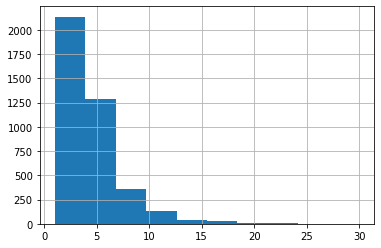

In [3]:
import pandas as pd
from nltk.tokenize import word_tokenize, sent_tokenize
mein_df = pd.read_csv("annotated_data/annotated_data_with_users_and_al_cleaned.csv", names=["ID", "Date", "Time", "Comment Level", "Username", "Opinion", "Sentiment", "Topic_comment", "Topic_article", "Comment", "Method"])
mein_df.loc[:, "länge"] = [len(word_tokenize(x)) for x in mein_df["Comment"]]
mein_df.loc[:, "sentences"] = [len(sent_tokenize(x)) for x in mein_df["Comment"]]
print(mein_df["länge"].mean())
# histogram = mein_df["länge"].hist().get_figure()
histogram2 = mein_df["sentences"].hist().get_figure()
histogram2.savefig("hist_sentences.png", facecolor="white")
# histogram.savefig("hist_länge.png", facecolor="white")


These outliers show a certain structure also mentioned by Sun et al. 2020 (https://arxiv.org/pdf/1905.05583.pdf): These long texts often contain most of their key information at the beginning and end of the text. Even though the text classification task discussed in Sun's paper mostly applies to classification of articles, we can still observer some parallels for the texts at hand.
<br>
As mentioned in the original BERT Paper from 2018 (https://arxiv.org/pdf/1810.04805.pdf), the maximum input size for BERT models is 512 tokens. This makes it especially difficult to work with texts which are longer than this input size, as they need to be truncated to an appropriate size. This process can be done in different ways as shown by Sun et al. 2020 (https://arxiv.org/pdf/1905.05583.pdf): They show three ways of truncation for larger texts: Head-only, tail-only and head+tail, where the first method only keeps the first 510 tokens, the second method the last 510 tokens, and the third method a combination of the first 128 and last 382 tokens. 
<br>
Long comments frequently start with sentences introducing the point of view of the commentator, followed by longer explanations of the matter at hand and ending with the commentator summarizing his point of view.
<br>
This is why applying the same methods used in Sun et al. could help increase the performance of our model. However, as we do not reach the size limit set by BERT, truncation will be applied in a different way: the most crude approach would be to simply choose a smaller limit for the token size. However, arbitrarily choosing this parameter could lead to truncations mid sentence, which in turn could lead to a decrease in performance of the model as within-sentence-coherence could be compromised for some samples in our data. This is why the chosen approach in this case would be to truncate based on sentences. 
<br>
This figure shows the distribution of the number of sentences for the comments of our data set.
<br>
<br>
![Histogram showing text size](hist_sentences.png "Sentences")
<br>
Most of the comments consist of 1 to 5 sentences, with a mean of 4 sentences for the dataset. This is why a truncation of two sentences for head and tail seems to be appropriate for the task at hand. 

In [4]:
data = pd.read_csv("annotated_data/annotated_data_with_users_and_al_cleaned2x.csv", names=["ID", "Date", "Time", "Comment Level", "Username", "Opinion", "Sentiment", "Topic_comment", "Topic_article", "Comment", "Method"])
truncated = [sent_tokenize(x)[:2] + sent_tokenize(x)[-2:] if len(sent_tokenize(x))  > 4 else sent_tokenize(x) for x in data["Comment"]]
truncated = [" ".join(x) for x in truncated]
data.loc[:, "Comment"] = truncated
data.to_csv("annotated_data_with_users_and_al_headtail.csv", header=False, index=False, encoding="utf-8")

### Testing off-the-shelf-models for sentiment analysis
Before fine-tuning on the annotated data, a pretrained model will be used in order to assess the performance of already exisiting models.

In [1]:
import pandas as pd
from germansentiment import SentimentModel

d:\Program Files (x86)\Miniconda3\envs\Masterarbeit\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
fully_annotated = pd.read_csv("annotated_data/annotated_data_with_users_and_al_cleaned2check.csv", names=["ID", "Date", "Time", "Comment Level", "Username", "Opinion", "Sentiment", "Topic_comment", "Topic_article", "Comment", "Method"], encoding="iso8859-1")

model = SentimentModel()

texts = list(fully_annotated.Comment)

sentiments = []

for i in range (len(texts)// 100 + 1):
    print(i)
    result = model.predict_sentiment(texts[i*100:i*100+100])
    sentiments.append(result)

print(len(sentiments), sentiments)

print(result)




0
1
2
3
4


RuntimeError: CUDA out of memory. Tried to allocate 790.00 MiB (GPU 0; 4.00 GiB total capacity; 1.77 GiB already allocated; 0 bytes free; 2.94 GiB reserved in total by PyTorch)

In [ ]:
fully_annotated = pd.read_csv("annotated_data/annotated_data_with_users_and_al_cleaned2check.csv", names=["ID", "Date", "Time", "Comment Level", "Username", "Opinion", "Sentiment", "Topic_comment", "Topic_article", "Comment", "Method"], encoding="ISO8859-1")
texts = list(fully_annotated.Comment)


### Testing for statistical independence between opinion and sentiment
Early chapters have shown that sentiment and opinion are two distinct features of samples found in the data set. However, the distribution of classes between sentiment and opinion has been found to show some characteristics which could hint at dependence between these two variables. The following table shows the quantitative distribution of sentiment and opinion for the data set. 

In [18]:
import pandas as pd
from scipy.stats import chi2_contingency
volle_data = pd.read_csv("annotated_data/annotated_data_with_users_and_al_cleaned2check.csv", encoding=" ISO-8859-1", header=None, names=["ID", "Date", "Time", "Comment Level", "Username", "Opinion", "Sentiment", "Topic_comment", "Topic_article", "Comment", "Method"])
volle_data_sentiment = volle_data["Sentiment"]
volle_data_opinion = volle_data["Opinion"]

table = pd.crosstab(volle_data_sentiment, volle_data_opinion)
table
chi2_contingency(table)


(1457.27100729792,
 0.0,
 4,
 array([[808.78378378, 709.45945946, 371.75675676],
        [826.75675676, 725.22522523, 380.01801802],
        [ 74.45945946,  65.31531532,  34.22522523]]))

The null hypothesis $H_0$ therefore states that there is no signification relation between our two variables Sentiment and Opinion, meaning that Sentiment and Opinion are independant of one another. The chi-squre test of independence was performed to test this relation. It was significant with $X^2 (4, N = 3996) = 1457.3, p < 0.001$, showing that there is indeed a relation between the variables Sentiment and Opinion.
<br>
This test shows that even though Sentiment and Opinion can differ from one another depending on the sample, they still depend on one another to a certain extent. This can to an extent also be seen in the cross tabulation above,